# Differential eigenvalue problems (EVPs)

As you may have probably heard before in the context of linear algebra, an eigenvalue problem consists in finding a scalar $\lambda$ such that 
    \begin{equation} 
        \bf{A} \bf{v} = \lambda \mathbf{B} \bf{v},
    \end{equation}
where matrices $\bf{A}$ and $\bf{B}$ are square and $\bf{v}$ is a vector. If $\bf{B}$ is different from the identity matrix, we call this problem *generalized*. The non-trivial solutions to this equation are called eigenpairs, where $\lambda$ is the *eigenvalue* and $\bf{v}$ is an *eigenvector*. A generalization of this occurs when we replace matrices and eigenvectors by linear differential operators and eigenfunctions. We usually rewrite this in the form 
    \begin{equation}        
        \mathcal{L} u = \lambda \omega u, 
    \end{equation}
where $\mathcal{L}$ is a linear differential operator, $\omega$ is often referred to as *weight function*, and $u = u(x)$ is defined over some finite interval $a < x < b$ (which can be easily generalised to 2D or 3D domains). Additionally, homogeneous boundary conditions need to be prescribed. If $\mathcal{L}$ satisfies certain mathematical conditions and $\omega(x)$ is smooth and does not change its sign in the intervale, then the solution of the eigenvalue problem enjoys the properties listed below:
- There is a countably infinite set of eigenvalues $\lambda_1, \lambda_2, \ldots$, which are real.
- Corresponding to each $\lambda_n$ is a unique eigenfunction $u_n(x)$ with $n-1$ zeros in $a < x < b$. Each solution is termed * fundamental solution*.
- The eigenfunctions form an orthonormal basis over $x\in[a,b]$, i.e., $$ \int^b_a \omega u_n u_m \, \mathrm{d} x = \delta_{nm}, $$       where $\delta_{nm}$ is the Kronecker delta. Note that an inner product can be defined as $[u, v] = $$ \int^b_a u v \,  \omega \, \mathrm{d} x$. Thus, $[u_n, u_m] = 0$ if $n \neq m$ (they are orthogonal) and $[u_n, u_n] = 1$ (they are orthonormal). 

Differential eigenvalue problems are fundamental in physics because they reveal the inherent properties of physical systems. For example, in quantum mechanics the Schrödinger equation is an eigenvalue problem whose discrete eigenvalues represent allowed energy levels, while the corresponding eigenfunctions describe stationary states. Similarly, in mechanical systems, eigenvalues determine natural frequencies and mode shapes, which are critical for understanding vibrations and resonances.

In fluid mechanics, EVPs play a central role in stability and transition analyses. When investigating the stability of fluid flows (such as in the Rayleigh–Bénard convection or in shear flow instabilities), the linearized governing equations often reduce to an eigenvalue problem. Here, the eigenvalues indicate growth or decay rates of disturbances, while the eigenfunctions describe the spatial structure of the unstable modes. This analysis helps predict the onset of hydrodynamic instabilities which eventually lead to turbulence and the nature of flow transitions.

### First example: the Schrödinger equation

Let us consider the steady Schr\"odinger equation for the wave function $u = u(x)$ under the action of a potential well $V(x)$. The governing equation that dictates a quantum state of a particle is the solution to the differential equation 
    \begin{equation}        
        - h^2 u'' + V u = \lambda u, \quad a < x < b,
    \end{equation}
where $h$ is a physical constant that depends on the mass of the particle. The constant $\lambda$ is often referred to as the *energy of the system* and is known to be quantized since only particular values of $\lambda$ (eigenvalues) are physically allowed. Note that this equation can be understood as a generalized EVP of the form $\mathcal{L} u = \lambda \omega u$, with $\mathcal{L} = -h^2 \frac{\mathrm{d}}{\mathrm{d}x^2} + V$ and $\omega = 1$. Also, we may need some boundary conditions. Let us assume $u$ vanishes at a distance $L$ sufficiently far away from the domain of action of $V$ such that $u(\pm L) = 0$ (thus, $-a=b=L$). Finding a solution to this problem is trivial when $V$ is a constant but, in general, is a difficult task to achieve analytically. 

> Note: as Wikipedia states it, a wave function can be an eigenvector of an observable, in which case it is called an eigenstate, and the associated eigenvalue corresponds to the value of the observable in that eigenstate. More generally, a quantum state will be a linear combination of the eigenstates, known as a quantum superposition.

Let's try first a **finite-difference** approach:

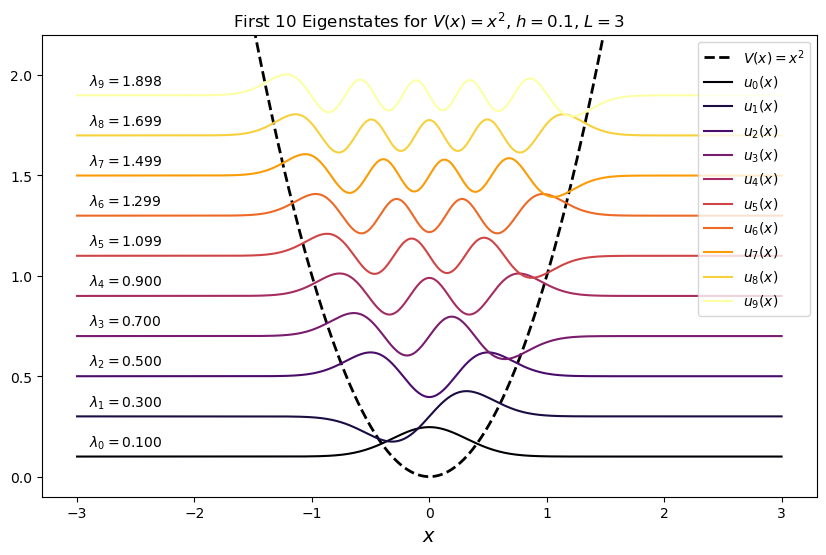

In [1]:
# Uncomment these lines if you want LaTeX rendered:
# import matplotlib
# matplotlib.rcParams['font.family'] = 'serif'
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' # This compiles basic mathematical formulas

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.sparse import diags as spdiags

# Parameters
L = 3.0       # we take domain as x in [-L,L]
h_val = 0.1
N = 500       # number of grid points for the finite-difference discretization

# Spatial grid and step size.
x = np.linspace(-L, L, N)
dx = x[1]-x[0]

# Define the potential: V(x) = x^2.
V = x**2

# Construct the second derivative matrix using central finite differences. Sparsity pattern is leveraged here...
diags = np.zeros((3, N))
diags[1, :] = -2.0/dx**2
diags[0, 1:] = 1.0/dx**2
diags[2, :-1] = 1.0/dx**2
D2 = spdiags(diags, offsets=[-1, 0, 1], shape=(N, N)).toarray()

# Impose Dirichlet boundary conditions: u(-L)=0 and u(L)=0.
D2[0, :] = 0; D2[0, 0] = 1.0
D2[-1, :] = 0; D2[-1, -1] = 1.0

# Construct the Hamiltonian operator: H = - h^2 * D2 + diag(V)
H = - (h_val**2) * D2 + np.diag(V)

# Solve the eigenvalue problem H u = lambda u.
eigvals, eigvecs = la.eigh(H)

# Select the first 10 eigenpairs.
num_states = 10
eigvals = eigvals[:num_states]
eigvecs = eigvecs[:, :num_states]

# Optionally normalize the eigenfunctions.
# for i in range(num_states):
#     norm = np.sqrt(np.sum(eigvecs[:, i]**2)*dx)
#     eigvecs[:, i] = eigvecs[:, i] / norm

# Prepare a colormap for the eigenstates.
colors = plt.cm.inferno(np.linspace(0, 1, num_states))

# Plot the potential and the first 10 eigenstates (staggered).
plt.figure(figsize=(10,6))
plt.plot(x, V, 'k--', lw=2, label="$V(x)=x^2$")
factor = 1.0
for i in range(num_states):
    plt.plot(x, eigvecs[:, i] + factor*eigvals[i], color=colors[i], lw=1.5, 
             label=rf"$u_{i:d}(x)$")   
    plt.text(-L+0.1, eigvecs[0, i] + factor*eigvals[i] + 0.05, rf"$\lambda_{i:d} = {eigvals[i]:.3f}$",
             color='k', fontsize=10)
    
plt.xlabel("$x$", fontsize=14)
# plt.ylabel("Eigenfunction + eigenvalue", fontsize=12)
plt.ylim(-0.1, 2.2)
plt.title("First 10 Eigenstates for $V(x)=x^2$, $h=0.1$, $L=3$", fontsize=12)
plt.legend(loc='upper right')
plt.show()

### Taylor–Couette Centrifugal Instability

For our purposes, the onset of centrifugal instability in Taylor–Couette flow is determined by finding the critical Taylor number $Ta$ at which a steady base flow becomes unstable. This is formulated as a sixth-order differential eigenvalue problem

$$
\bigl(\mathcal{A} - Ta\,\mathcal{B}\bigr) u = 0,
$$

where the differential operators are defined by

$$
\mathcal{A} = \Bigl(D^2 - k^2\Bigr)^3, \qquad \mathcal{B} = -k^2\,\Bigl[1-(1-\mu) y\Bigr],
$$

with $D = \frac{d}{dy}$ denoting differentiation with respect to $y$, where $y \in (0,1)$. Here, $k>0$ is the wavenumber, which sets the characteristic aspect ratio of the instability rolls, and $\mu$ (with $-1 < \mu < 1$) is a parameter related to the rotation (or gap) ratio. The eigenvalue $Ta$ is interpreted as the Taylor number, a dimensionless measure of the ratio of centrifugal to viscous forces.

The homogeneous boundary conditions for this sixth-order problem are imposed at both $y=0$ and $y=1$:

$$
u = 0, \qquad \Bigl(D^2 - k^2\Bigr) u = 0, \qquad D\Bigl[(D^2 - k^2)u\Bigr] = 0.
$$

Physically, the eigenfunctions $u(y)$ represent the spatial structure of the disturbance modes in the flow, and the smallest positive eigenvalue $Ta$ (as a function of $k$) determines the onset of instability. In practice, one sweeps the wavenumber $k$ (typically over the range $0 < k \le 5$) to obtain the curve $Ta(k)$, which is expected to have a minimum near $k \simeq \pi$ (corresponding to nearly square rolls) for $\mu>0$. This minimum value is the critical Taylor number that marks the threshold for centrifugal instability.

**Numerical Strategy:**

1. **Spectral Collocation:**  
   The sixth-order differential operator is discretized using Chebyshev spectral collocation on the interval $y \in [0,1]$. This approach produces highly accurate differentiation matrices for constructing the operators $\mathcal{A}$ and $\mathcal{B}$.

2. **Matrix Assembly and Boundary Enforcement:**  
   The discretized operators are assembled into matrices. The six boundary conditions (three at $y=0$ and three at $y=1$) are imposed by appropriately modifying the corresponding rows of these matrices.

3. **Generalized Eigenvalue Problem:**  
   The discretized eigenvalue problem takes the form

   $$
   \mathbf{A}\,\mathbf{u} = Ta\, \mathbf{B}\,\mathbf{u},
   $$

   where $\mathbf{A}$ and $\mathbf{B}$ are the finite-dimensional representations of $\mathcal{A}$ and $\mathcal{B}$, respectively. This generalized eigenvalue problem is then solved using a standard eigenvalue solver, and the smallest positive eigenvalue $Ta$ is extracted.

4. **Parameter Sweep and Criticality:**  
   The wavenumber $k$ is varied over a specified range (e.g., $0 < k \le 5$). For each value of $k$, the generalized eigenvalue problem is solved to obtain $Ta(k)$. The critical Taylor number is identified as the minimum value of $Ta(k)$, and the corresponding $k$ is the critical wavenumber for the instability.

More on this problem can be found [here](https://en.wikipedia.org/wiki/Taylor%E2%80%93Couette_flow) and
1. Drazin, P. G. and Reid, W. H. (2004). *Hydrodynamic Stability* (2nd ed.). Cambridge University Press.     
2. Charru, F. (2011). *Hydrodynamic Instabilities*. Cambridge University Press.  
   


Critical Taylor number Ta = 1717.614732345774 at wavenumber k = 3.1052631578947367


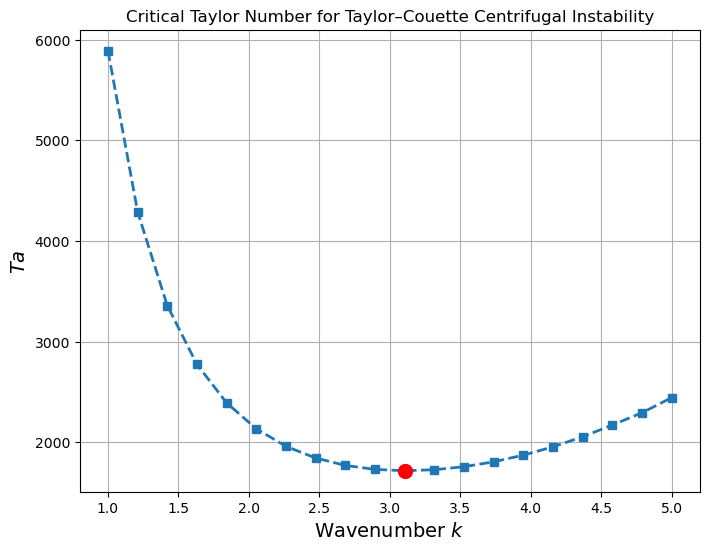

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

def cheb(N):
    """
    Compute the Chebyshev differentiation matrix and nodes on [-1,1].
    Returns D (of size (N+1)x(N+1)) and x (nodes).
    """
    if N == 0:
        return np.array([[0]]), np.array([1])
    x = np.cos(np.pi * np.arange(N+1) / N)
    c = np.ones(N+1)
    c[0] = 2; c[-1] = 2
    c = c * ((-1)**np.arange(N+1))
    X = np.tile(x, (N+1, 1))
    dX = X - X.T
    D = np.outer(c, 1/c) / (dX + np.eye(N+1))
    D = D - np.diag(np.sum(D, axis=1))
    return D, x

# Parameters for the Taylor-Couette eigenvalue problem.
mu = 1.0   # example value in (-1,1)
N = 50     # number of Chebyshev nodes (resolution)
D, x_cheb = cheb(N)
# Map nodes from [-1,1] to [0,1]:
y_nodes = (x_cheb + 1) / 2.0
# Scale the differentiation matrix accordingly:
D_y = 2 * D          # Because dy/dx = 1/2 => d/dy = 2 d/dx.
D2_y = 4 * np.dot(D, D)
n = N + 1
I = np.eye(n)

# Define the operators:
# For given wavenumber k, define M = D2_y - k^2 I.
# Then, our operator A = M^3 and B = - k^2 * diag(1 - (1-mu)*y_nodes).
# Both A and B are of size (n x n).

# Next, we must impose the six homogeneous boundary conditions:
#   u = 0,   (M u) = 0,   (D_y M u) = 0  at y = 1 (i.e., at index 0)
#   u = 0,   (M u) = 0,   (D_y M u) = 0  at y = 0 (i.e., at index n-1).
#
# We do this by replacing rows 0, 1, 2 and rows n-3, n-2, n-1 appropriately:
def impose_bc(A_mat, B_mat, D_y, M):
    # Top boundary (y = 1) is at index 0.
    A_mat[0, :] = 0; A_mat[0, 0] = 1.0;  B_mat[0, :] = 0   # u(1)=0.
    A_mat[1, :] = M[0, :];               B_mat[1, :] = 0   # (M u)(1) = 0.
    A_mat[2, :] = (D_y @ M)[0, :];       B_mat[2, :] = 0   # D_y (M u)(1) = 0.
    # Bottom boundary (y = 0) is at index n-1.
    A_mat[-3, :] = 0; A_mat[-3, -3] = 1.0;  B_mat[-3, :] = 0  # u(0)=0.
    A_mat[-2, :] = M[-1, :];                B_mat[-2, :] = 0  # (M u)(0) = 0.
    A_mat[-1, :] = (D_y @ M)[-1, :];        B_mat[-1, :] = 0  # D_y (M u)(0) = 0.
    return A_mat, B_mat

# Sweep over wavenumber k.
k_vals = np.linspace(1, 5, 20)
Ta_vals = []  # to store critical Taylor numbers for each k

for k in k_vals:
    M = D2_y - k**2 * I
    A_mat = M @ M @ M   # sixth-order operator: (D2_y - k^2 I)^3.
    B_mat = - k**2 * np.diag(1 - (1-mu)*y_nodes)
    
    # Impose the six boundary conditions via row replacement.
    A_mat, B_mat = impose_bc(A_mat, B_mat, D_y, M)
    
    # Solve the generalized eigenvalue problem: A_mat * u = Ta * B_mat * u.
    eigvals, eigvecs = la.eig(A_mat, B_mat)
    
    # Select eigenvalues with negligible imaginary part and positive real part.
    eigvals_real = np.real(eigvals[np.abs(np.imag(eigvals)) < 1e-8])
    pos_eigs = eigvals_real[eigvals_real > 0]
    if len(pos_eigs) == 0:
        Ta_vals.append(np.nan)
    else:
        Ta_vals.append(np.min(pos_eigs))

Ta_vals = np.array(Ta_vals)

plt.figure(figsize=(8,6))
plt.plot(k_vals, Ta_vals, 's--', lw=2)
plt.xlabel("Wavenumber $k$", fontsize=14)
plt.ylabel("$Ta$", fontsize=14)
plt.title("Critical Taylor Number for Taylor–Couette Centrifugal Instability", fontsize=12)
plt.grid(True)

# Find the minimum of Ta(k).
if np.all(np.isnan(Ta_vals)):
    print("No valid eigenvalues found.")
else:
    idx_min = np.nanargmin(Ta_vals)
    Ta_crit = Ta_vals[idx_min]
    k_crit = k_vals[idx_min]
    plt.plot(k_crit,Ta_crit,'or',markersize=10)
    print("Critical Taylor number Ta =", Ta_crit, "at wavenumber k =", k_crit)

plt.show()



Problem set-up and experimental observation of the rolls:

<img src="https://www.researchgate.net/publication/46610403/figure/fig5/AS:667677957820430@1536198238564/Taylor-Couette-experimental-set-up-The-flow-regime-shown-here-corresponds-to-toroidal.png" alt="Descriptive Alt Text" width="300" height="200"> <img src="https://atoc.colorado.edu/TeachingandLearning/Demonstrations/TaylorCouette/TaylorCouette_Apparatus.jpg" alt="Descriptive Alt Text" width="400" height="400">

